<img style="float: top; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-FondoAzul.png" width="600" height="300" /> 

# Finanzas Cuantitativas
## Homework CRR

**Date:** 01/05/2023
    
**Name:** Ricardo Rodriguez Salcedo 
    
**Exp** : 722544




**1) For a Call and a Put option, determine the number of steps that the CRR models require to converge to B&S (error 0.0001)**

> You can use your own parameter, but the options must be ITM or OOM (not ATM).
Make sure to plot the convergence process. Numbers of steps (x), CRR solution (y1), B&S solution (y2)

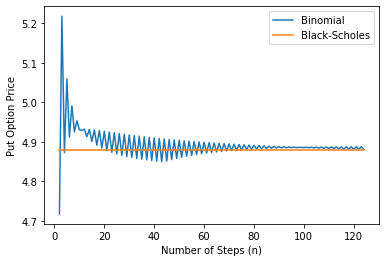

,n,Binomial Put,BS Put,Error
0,2,4.717512,4.880315,0.162804
1,3,5.218134,4.880315,0.337819
2,4,4.872862,4.880315,0.007453
3,5,5.059187,4.880315,0.178872
4,6,4.912323,4.880315,0.032008
...,...,...,...,...
118,120,4.881135,4.880315,0.000820
119,121,4.887712,4.880315,0.007397
120,122,4.880743,4.880315,0.000428
121,123,4.887780,4.880315,0.007465


In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
S = 50  #initial underlying asset price
r = 0.05    #risk-free interest rate
K = 52   #strike price
v = 0.26 #volatility
T = 1

def put_option_price(S, r, K, v, T):
    results = []
    n = 2
    while True:
        dt = T/n 
        u = np.exp(v*np.sqrt(dt))
        d = 1./u
        p = (np.exp(r*dt)-d) / (u-d) 

        # Binomial price tree
        stockvalue = np.zeros((n+1,n+1))
        stockvalue[0,0] = S
        for i in range(1,n+1):
            stockvalue[i,0] = stockvalue[i-1,0]*u
            for j in range(1,i+1):
                stockvalue[i,j] = stockvalue[i-1,j-1]*d

        # Option value at final node
        optionvalue= np.zeros((n+1,n+1))
        for j in range(n+1):
            optionvalue[n,j] = max(K-stockvalue[n,j],0)

        # Backward calculation for option price
        for i in range(n-1,-1,-1):
            for j in range(i+1):
                optionvalue[i,j]= np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])

        # Black-Scholes put option price
        d1 = (np.log(S/K) + (r + 0.5*v**2)*T) / (v*np.sqrt(T))
        d2 = d1 - v*np.sqrt(T)
        bs_put = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

        # Compute error
        error = np.abs(bs_put - optionvalue[0,0])

        # Append results to list
        results.append((n, optionvalue[0,0], bs_put, error))

        # Check convergence and break out of loop
        if error <= 0.0001:
            break

        # Increment n for next iteration
        n += 1

    df = pd.DataFrame(results, columns=["n", "Binomial Put", "BS Put", "Error"])
    plt.plot(df['n'], df['Binomial Put'], label='Binomial')
    plt.plot(df['n'], df['BS Put'], label='Black-Scholes')
    plt.xlabel('Number of Steps (n)')
    plt.ylabel('Put Option Price')
    plt.legend()
    plt.show()
    return df

european_put = put_option_price(S, r, K, v, T)
european_put

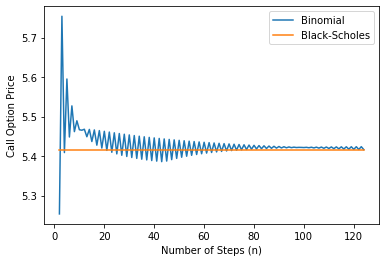

,n,Binomial Call,BS Call,Error
0,2,5.253582,5.416385,0.162804
1,3,5.754204,5.416385,0.337819
2,4,5.408932,5.416385,0.007453
3,5,5.595257,5.416385,0.178872
4,6,5.448393,5.416385,0.032008
...,...,...,...,...
118,120,5.417205,5.416385,0.000820
119,121,5.423782,5.416385,0.007397
120,122,5.416813,5.416385,0.000428
121,123,5.423850,5.416385,0.007465


In [1]:
def call_option_price(S, r, K, v, T):
    results = []
    n = 2
    while True:
        dt = T/n 
        u = np.exp(v*np.sqrt(dt))
        d = 1./u
        p = (np.exp(r*dt)-d) / (u-d) 

        # Binomial price tree
        stockvalue = np.zeros((n+1,n+1))
        stockvalue[0,0] = S
        for i in range(1,n+1):
            stockvalue[i,0] = stockvalue[i-1,0]*u
            for j in range(1,i+1):
                stockvalue[i,j] = stockvalue[i-1,j-1]*d

        # Option value at final node
        optionvalue= np.zeros((n+1,n+1))
        for j in range(n+1):
            optionvalue[n,j] = max(stockvalue[n,j]-K,0)

        # Backward calculation for option price
        for i in range(n-1,-1,-1):
            for j in range(i+1):
                optionvalue[i,j]= np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])

        # Black-Scholes call option price
        d1 = (np.log(S/K) + (r + 0.5*v**2)*T) / (v*np.sqrt(T))
        d2 = d1 - v*np.sqrt(T)
        bs_call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

        # Compute error
        error = np.abs(bs_call - optionvalue[0,0])

        # Append results to list
        results.append((n, optionvalue[0,0], bs_call, error))

        # Check convergence and break out of loop
        if error <= 0.0001:
            break

        # Increment n for next iteration
        n += 1

    df = pd.DataFrame(results, columns=["n", "Binomial Call", "BS Call", "Error"])
    plt.plot(df['n'], df['Binomial Call'], label='Binomial')
    plt.plot(df['n'], df['BS Call'], label='Black-Scholes')
    plt.xlabel('Number of Steps (n)')
    plt.ylabel('Call Option Price')
    plt.legend()
    plt.show()
    return df

european_call = call_option_price(S, r, K, v, T)
european_call

**2) Once you have determined the number of steps for an error of 0.0001 (section 1); Get the price of American Options using the same parameters as above**

In [9]:
n = 124    #number of steps for error of 0.0001
S = 50  #initial underlying asset price
r = 0.05    #risk-free interest rate
K = 52   #strike price
v = 0.26 #volatility
T = 1
c=2

#%% Opcion americana PUT
def American_Option_Put(n,S,r,K,v,T,c):
    dt = T/n 
    u =  np.exp(v*np.sqrt(dt))
    d =  1./u
    p = (np.exp(r*dt)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    decision = np.zeros((n+1,n+1))

    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d


    #option value at final node
    optionvalue= np.zeros((n+1,n+1))
    for j in range(n+1):
        optionvalue[n,j] = max(K-stockvalue[n,j],0) # se cambia para compra



    #Backward calculation for option price
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            F1 = np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
            F2 = max(K-stockvalue[i,j],0)
            optionvalue[i,j]= max(F1,F2)


    return print('American Put Option: ',optionvalue[0,0])


#%% Opcion americana Call
def American_Option_Call(n,S,r,K,v,T,c):
    dt = T/n 
    u =  np.exp(v*np.sqrt(dt))
    d =  1./u
    p = (np.exp(r*dt)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    decision = np.zeros((n+1,n+1))

    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d


    #option value at final node
    optionvalue= np.zeros((n+1,n+1))
    for j in range(n+1):
        optionvalue[n,j] = max(K-stockvalue[n,j],0) # se cambia para compra



    #Backward calculation for option price
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            F1 = np.exp(-r*dt)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1])
            F2 = max(stockvalue[i,j]-K,0)
            optionvalue[i,j]= max(F1,F2)


    return print('American Call Option: ',optionvalue[0,0])

American_Option_Put(n,S,r,K,v,T,c),American_Option_Call(n,S,r,K,v,T,c)

American Put Option:  5.229649880392746
American Call Option:  10.274355809804373


(None, None)

**3) Check the fair value of European and American options (call & put) and draw some conclusions**

The Fair values i obtained are the next:

> American Put Option:  5.229649880392746

> American Call Option:  10.274355809804373

> Binomial Put Option: 4.880360

> Binomial Call Option: 5.416429

we can compare the fair values of American and European options as well as the fair values calculated using the binomial pricing model.

The fair value of the American call option (10.274) is higher than the fair value of the European call option. This is because the American option can be exercised at any time before the expiration date, while the European option can only be exercised at expiration. Thus, the American option gives the holder more flexibility, which increases its value.
The fair value of the American put option (5.230) is also higher than the fair value of the European put option. The same reasoning applies here as for the call options.
The fair values calculated using the binomial pricing model are lower than the fair values of the American options but higher than the fair values of the European options. This is because the binomial model takes into account the possibility of early exercise, but it does not allow for continuous exercise like the Black-Scholes model does.
Based on these results, we can conclude that American options are generally more valuable than European options due to their greater flexibility. However, this flexibility comes at a cost, as American options are typically more expensive than European options. Additionally, the binomial pricing model can provide a good approximation of option prices, especially for American-style options, but the Black-Scholes model is still widely used due to its simplicity and ease of use.